# E8 - Nicolas DESJONQUERES

# I - Algorithm

In [37]:
import matplotlib.pyplot as plt

def branch_and_bound(revenues, days, max_days):
    n = len(revenues)
    best_value = 0
    best_solution = []
    
    def bb(index, current_value, current_days, solution):
        nonlocal best_value, best_solution
        
        if index == n:
            if current_value > best_value:
                best_value = current_value
                best_solution = solution
            return

        if current_days + days[index] <= max_days:
            bb(index + 1, current_value + revenues[index], current_days + days[index], solution + [1])

        bb(index + 1, current_value, current_days, solution + [0])
    
    bb(0, 0, 0, [])
    return best_value, best_solution

In [75]:
def branch_and_bound_display(projects, revenues, days, max_days):
    best_value, best_solution = branch_and_bound(revenues, days, max_days)
    
    print("Optimal revenue:", best_value)
    print("Optimal solution:", best_solution)
    
    print("Projects to take:", " ".join([str(projects[i]) for i in range(len(best_solution)) if best_solution[i] == 1]))

In [69]:
import pandas as pd

def import_problem_from_csv(file_name):
    df = pd.read_csv(file_name, delimiter=';')
    return df['Project'].tolist(), df['Revenue'].tolist(), df['Days'].tolist()

# II - Example

In [76]:
projects, revenues, days = import_problem_from_csv("problem1.csv")

branch_and_bound_display(projects, revenues, days, 150)

Optimal revenue: 64
Optimal solution: [0, 0, 0, 1, 1, 1]
Projects to take: 4 5 6


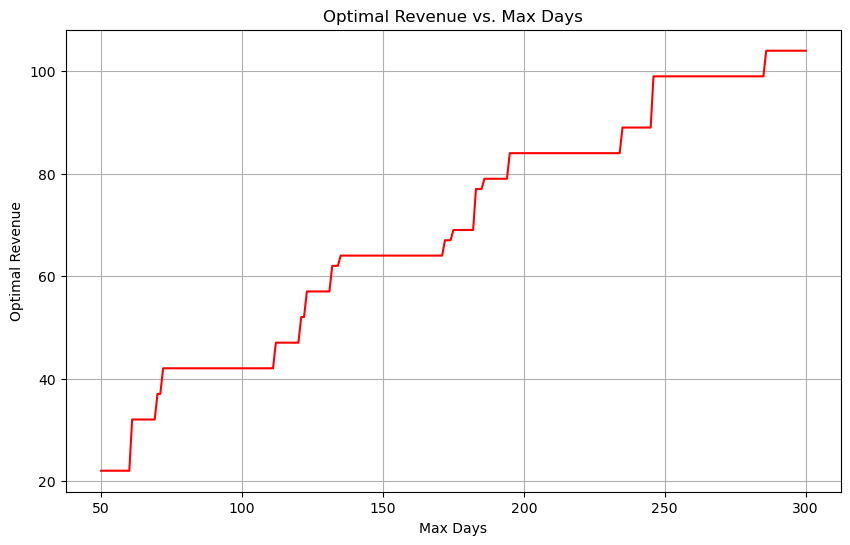

In [77]:
_, revenues, days = import_problem_from_csv("problem1.csv")

max_days_range = range(50, 301)
optimal_revenues = []

for max_days in max_days_range:
    best_value, _ = branch_and_bound(revenues, days, max_days)
    optimal_revenues.append(best_value)

plt.figure(figsize=(10, 6))
plt.plot(max_days_range, optimal_revenues, color='r')
plt.title('Optimal Revenue vs. Max Days')
plt.xlabel('Max Days')
plt.ylabel('Optimal Revenue')
plt.grid(True)
plt.show()